# 定义流失

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime 
import matplotlib.pyplot as plt
import math
import os

In [3]:
#载入数据
path=os.path.abspath('..')
path1=path+'/data/CustData.csv'
path1
CustData=pd.read_csv(path1,encoding='gbk')
CustData.columns=['num','Date','CustID','total','F','CustType','Provice']
CustData.head()

,num,Date,CustID,total,F,CustType,Provice
0,1,2017/3/1,205,10771.34,105,自助成员,广西
1,2,2017/3/1,213,1416.05,5,线上成员,内蒙
2,3,2017/3/1,261,2015.64,13,线上成员,广西
3,4,2017/3/1,447,1430.97,16,线下成员,西藏
4,5,2017/3/1,451,524.31,48,自助成员,西藏


In [5]:
CustData['Date1']=list(map(lambda x:datetime.strptime(x, '%Y/%m/%d'),CustData['Date']))
CustData.head()

,num,Date,CustID,total,F,CustType,Provice,Date1
0,1,2017/3/1,205,10771.34,105,自助成员,广西,2017-03-01
1,2,2017/3/1,213,1416.05,5,线上成员,内蒙,2017-03-01
2,3,2017/3/1,261,2015.64,13,线上成员,广西,2017-03-01
3,4,2017/3/1,447,1430.97,16,线下成员,西藏,2017-03-01
4,5,2017/3/1,451,524.31,48,自助成员,西藏,2017-03-01


In [7]:
CustDataR=CustData['Date1'].groupby([CustData['CustID']]).max().reset_index(drop=False)
CustDataR

,CustID,Date1
0,1001-1431,2017-06-27
1,1001-1432,2017-05-26
2,1001-1433,2017-06-21
3,1001-1434,2017-05-24
4,1001-1438,2017-06-21
...,...,...
3907,Z03051,2017-06-17
3908,Z03053,2017-06-29
3909,Z03056,2017-05-24
3910,Z03061,2017-06-06


In [8]:
#求除最后一次购买时间外,最大购买时间，即倒数第二次购买时间
MergeData=pd.merge(CustData,CustDataR,on='CustID',how='left')
CustData2=MergeData.loc[MergeData['Date1_x']!=MergeData['Date1_y'],]
CustDataR2=CustData2['Date1_x'].groupby([CustData2['CustID']]).max().reset_index(drop=False)
CustDataR2.head()

,CustID,Date1_x
0,1001-1431,2017-06-20
1,1001-1432,2017-05-23
2,1001-1433,2017-05-19
3,1001-1434,2017-03-20
4,1001-1438,2017-05-24


In [9]:
# 最后一次购买与倒数第二次购买时间间隔
MergeData2=pd.merge(CustDataR,CustDataR2,on='CustID')
MergeData2['R']=(MergeData2['Date1']-MergeData2['Date1_x']).dt.days
MergeData2.head()

,CustID,Date1,Date1_x,R
0,1001-1431,2017-06-27,2017-06-20,7
1,1001-1432,2017-05-26,2017-05-23,3
2,1001-1433,2017-06-21,2017-05-19,33
3,1001-1434,2017-05-24,2017-03-20,65
4,1001-1438,2017-06-21,2017-05-24,28


In [10]:
#累计分布
Grouped=MergeData2.groupby('R')['R'].count()
Grouped.index.name=''
NewCustData=Grouped.reset_index(drop=False)
NewCustData.columns=['R','Cnt']
NewCustData['cumPrt']=NewCustData['Cnt'].cumsum()/NewCustData['Cnt'].sum()
NewCustData.head()

,R,Cnt,cumPrt
0,1,624,0.192059
1,2,263,0.273007
2,3,152,0.319791
3,4,105,0.352108
4,5,88,0.379194


54
35


/Users/zhangchunyao/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/zhangchunyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/zhangchunyao/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


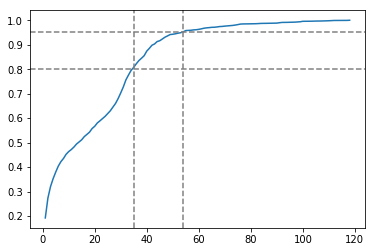

In [11]:
fig, ax1 = plt.subplots()
ax1.plot(NewCustData['R'],NewCustData['cumPrt'])
minInd95=NewCustData.loc[NewCustData['cumPrt']>0.95,'R'].min()
minInd80=NewCustData.loc[NewCustData['cumPrt']>0.80,'R'].min()
print(minInd95)
print(minInd80)
ax1.axvline(minInd95,linestyle='--',c='grey')
ax1.axhline(0.95,linestyle='--',c='grey')
ax1.axvline(minInd80,linestyle='--',c='grey')
ax1.axhline(0.8,linestyle='--',c='grey')

In [12]:
Max=max(CustDataR['Date1'])
# 计算最后一次交易时间距离当前（数据采集日）的时间间隔
CustDataR['CurR']=(Max-CustDataR['Date1']).dt.days
CustDataR.head()
#CustDataR['isLost']=???

,CustID,Date1,CurR
0,1001-1431,2017-06-27,3
1,1001-1432,2017-05-26,35
2,1001-1433,2017-06-21,9
3,1001-1434,2017-05-24,37
4,1001-1438,2017-06-21,9
